## Customer Segmentation

## Imorting Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
from mpl_toolkits import mplot3d
import datetime as dt

sns.set_style("whitegrid")

## Loading Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%203/data/data.csv",encoding = 'unicode_escape')
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 541909 observations for 8 predictors.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df = df[(df["InvoiceDate"].dt.year!=2011)|(df["InvoiceDate"].dt.month!=12)]

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom


## Cleaning up the Data

Delete NaN rows

In [ ]:
df[df.isin(["NaN","missing","?","??"]).any(axis=1)].shape[0]

56

In [ ]:
df = df[df.isin(["NaN","missing","?","??"]).any(axis=1) == False]
df.shape

(516328, 8)

Deal with the description format

In [ ]:
df["Description"].nunique()

4211

In [ ]:
df["Description"].str.lower().str.strip().nunique()

4183

In [ ]:
df["Description"] = df["Description"].str.lower().str.strip()

<ipython-input-80-32a64347ba8b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Dealing with non items

In [ ]:
df = df[df["Description"].isin(["amazon fee", "samples", "postage", "packing charge","manual","discount","adjust bad debt","bank charges","cruk commission","next day carriage"]) == False]


Delete null price and quantities

In [ ]:
df = df[(df["UnitPrice"]!=0)&(df["Quantity"]!=0)]

Deal with data inconsistencies

In [ ]:
df["Description"].nunique()


4018

In [ ]:
df["StockCode"].nunique()

3924

In [ ]:
df.groupby("StockCode")["Description"].nunique().sort_values(ascending = False)

StockCode
23236           4
23196           4
23131           3
23413           3
23370           3
               ..
22419           1
22420           1
22421           1
22422           1
gift_0001_50    1
Name: Description, Length: 3924, dtype: int64

In [ ]:
for stack_code in df["StockCode"].unique():
    first_description = df[df["StockCode"]==stack_code]["Description"].unique()[0]
    df.loc[df["StockCode"]==stack_code, "Description"] = first_description

In [ ]:
df.groupby("Description")["StockCode"].nunique().sort_values(ascending = False)

Description
metal sign,cupcake single hook      6
set of 4 fairy cake placemats       4
columbian candle round              3
pink stitched wall clock            2
woven berries cushion cover         2
                                   ..
french style storage jar bonbons    1
french style storage jar cafe       1
french style storage jar jam        1
french toilet sign blue metal       1
zinc wire sweetheart letter tray    1
Name: StockCode, Length: 3791, dtype: int64

In [ ]:
for description in df["Description"].unique():
    first_code = df[df["Description"]==description]["StockCode"].unique()[0]
    df.loc[df["Description"]==description, "StockCode"] = first_code

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     124510
Country             0
dtype: int64


Deal with outliers

<Axes: ylabel='TotalPrice'>

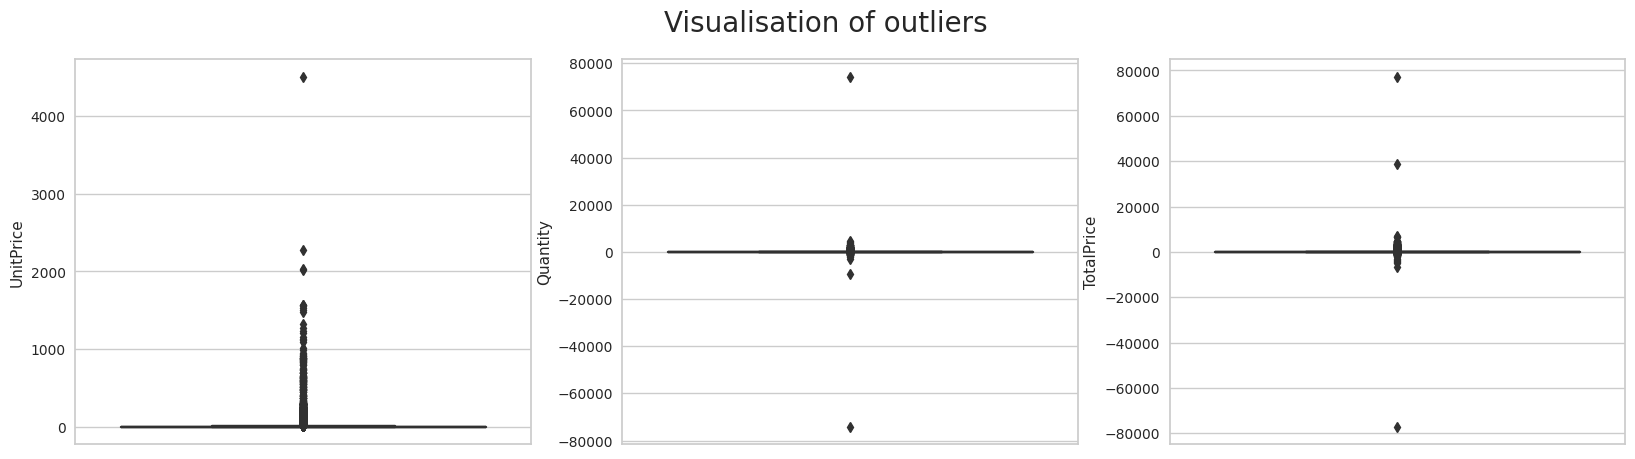

In [ ]:
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]

fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=df,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=df,y="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=df,y="TotalPrice")

In [ ]:
df = df[(np.abs(stats.zscore(df[["TotalPrice"]])) < 3).all(axis=1)]

## Exploratory Data analysis

What is the general sales trend?

In [ ]:
general_trend = pd.DataFrame(data={'Date':pd.to_datetime(df.InvoiceDate).dt.date,
                                  'Total price':df.Quantity*df.UnitPrice})
general_trend = general_trend.groupby("Date")["Total price"].sum()
general_trend = pd.DataFrame(general_trend)
general_trend

,Total price
Date,
2010-12-01,50808.84
2010-12-02,40825.08
2010-12-03,40036.58
2010-12-05,30957.28
2010-12-06,47443.80
...,...
2011-11-25,44171.91
2011-11-27,20565.22
2011-11-28,49079.35


In [ ]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,12)]
dates

[Timestamp('2010-12-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-02-01 00:00:00'),
 Timestamp('2011-03-01 00:00:00'),
 Timestamp('2011-04-01 00:00:00'),
 Timestamp('2011-05-01 00:00:00'),
 Timestamp('2011-06-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-08-01 00:00:00'),
 Timestamp('2011-09-01 00:00:00'),
 Timestamp('2011-10-01 00:00:00'),
 Timestamp('2011-11-01 00:00:00')]

In [ ]:
rolling_days = general_trend.copy()
rolling_days["Total price"] = rolling_days["Total price"].rolling(window=30).mean()
rolling_days

,Total price
Date,
2010-12-01,NaN
2010-12-02,NaN
2010-12-03,NaN
2010-12-05,NaN
2010-12-06,NaN
...,...
2011-11-25,46440.785333
2011-11-27,46717.891667
2011-11-28,47109.052000


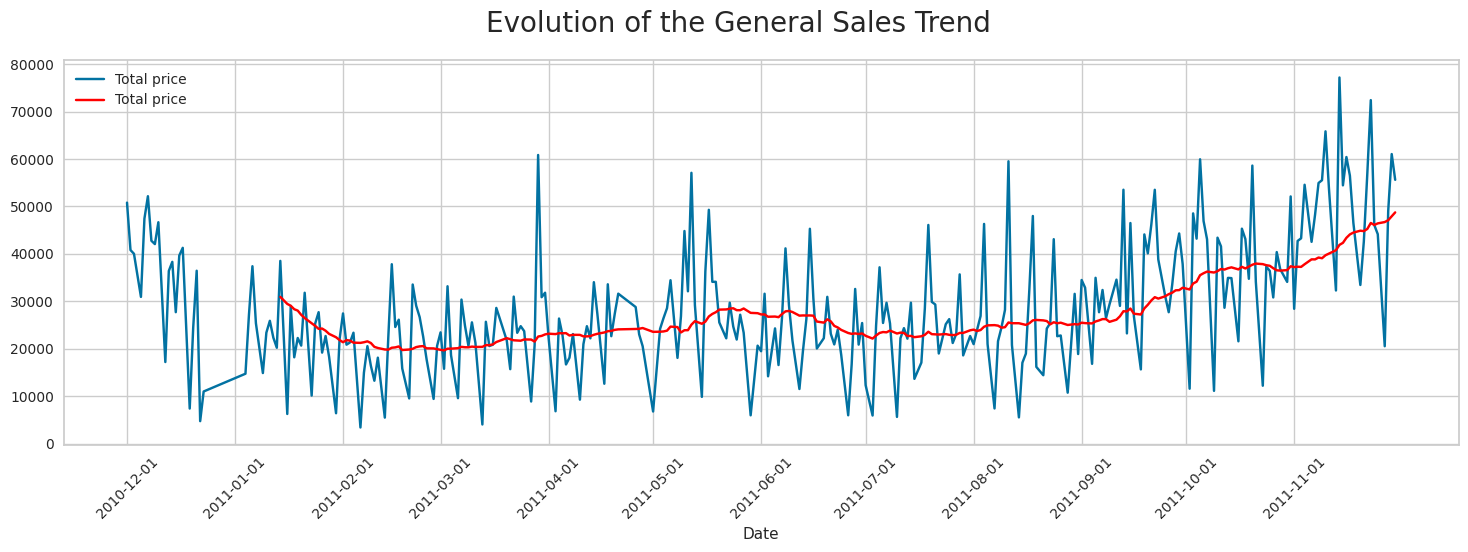

In [ ]:
plt.figure(figsize = (18,5)).suptitle('Evolution of the General Sales Trend', fontsize=20)
sns.lineplot(data=general_trend)
sns.lineplot(data=rolling_days, palette=['red'])
plt.xticks(dates,rotation = 45)
plt.show()

In [ ]:
general_trend.index = pd.to_datetime(general_trend.index)
general_trend_months = general_trend.groupby([general_trend.index.year,general_trend.index.month])['Total price'].sum()
general_trend_months = pd.DataFrame(general_trend_months)
general_trend_months


Total price
Date Date             
2010 12     678728.300
2011 1      530649.820
     2      482045.810
     3      643790.990
     4      475877.451
     5      694332.130
     6      620456.720
     7      621908.121
     8      654239.280
     9      902618.741
     10     965988.770
     11    1299220.630

In [ ]:
general_trend_months["Date"] = dates

What is an average cart by country?

In [ ]:
average_cart_countries = df.groupby("Country").TotalPrice.mean()
average_cart_countries = pd.DataFrame(average_cart_countries).reset_index()

average_price_countries = df.groupby("Country").UnitPrice.mean()
average_price_countries = pd.DataFrame(average_price_countries).reset_index()

average_quantity_countries = df.groupby("Country").Quantity.mean()
average_quantity_countries = pd.DataFrame(average_quantity_countries).reset_index()

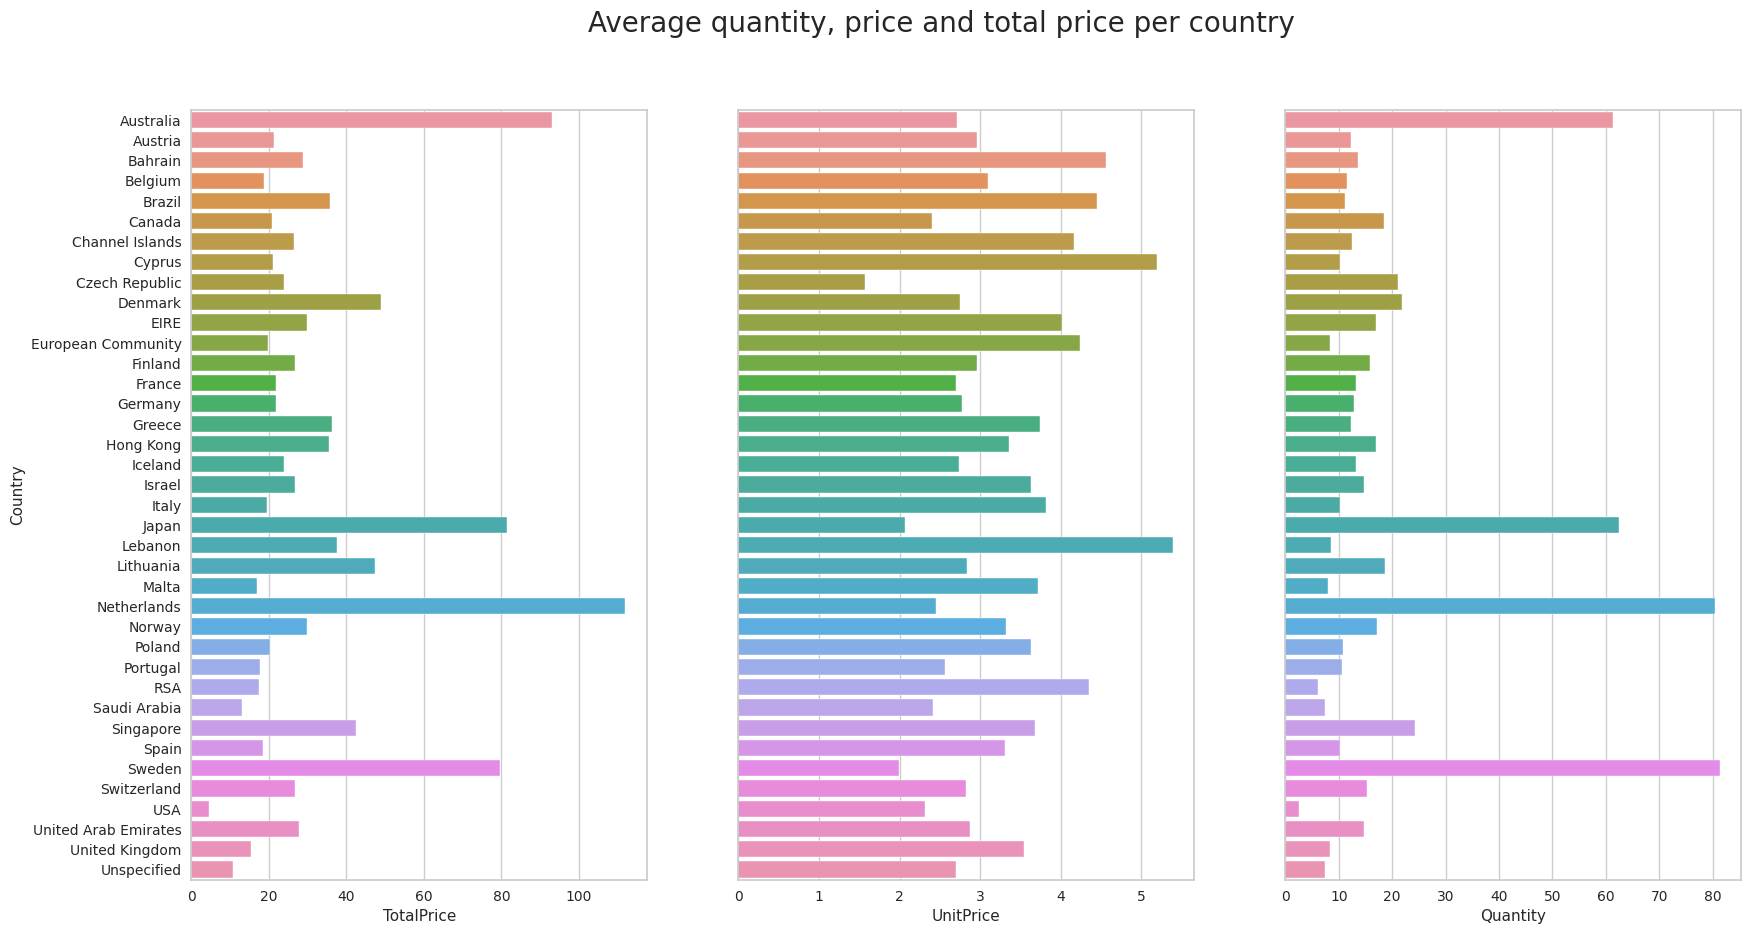

In [ ]:
fig = plt.figure(figsize = (20,10))
fig.suptitle("Average quantity, price and total price per country",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.barplot(data=average_cart_countries,x="TotalPrice",y="Country")

axes = fig.add_subplot(1, 3, 2)
sns.barplot(data=average_price_countries,x="UnitPrice",y="Country")
fig.axes[1].get_yaxis().set_visible(False)

axes = fig.add_subplot(1, 3, 3)
sns.barplot(data=average_quantity_countries,x="Quantity",y="Country")
fig.axes[2].get_yaxis().set_visible(False)

In [ ]:
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = average_cart_countries["Country"],
                  locationmode = "country names",
                  z = average_cart_countries["TotalPrice"].astype(float).round(0).tolist(),
                  hovertext = average_cart_countries["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Total Price", },
                )

layout = dict(
              title = "Average Total Price Per Cart By Country",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}
             )

fig = go.Figure(data=choro_data, layout=layout)
iplot(fig)


What are the best selling products?

In [ ]:
sum_total_price_products = pd.DataFrame(df.groupby(["Country","Description"])["TotalPrice"].sum())
best_selling_product = pd.DataFrame(data=sum_total_price_products.groupby(["Country"])['TotalPrice'].idxmax().values.tolist(),columns =['Country', 'Best Selling Product'])

max_sales = sum_total_price_products.groupby("Country")["TotalPrice"].max().values.tolist()
best_selling_product["Sales"] = max_sales

total_sales = sum_total_price_products.groupby("Country")["TotalPrice"].sum().values.tolist()
best_selling_product["Country total sales"] = total_sales

best_selling_product["% of country sales"] = best_selling_product["Sales"]/best_selling_product["Country total sales"]

In [ ]:
best_selling_product \
.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), \
 subset=["% of country sales"]) \
.format({"% of country sales":"{:.2%}",
         "Sales":"£{:,.0f}",
         "Country total sales":"£{:,.0f}"})

,Country,Best Selling Product,Sales,Country total sales,% of country sales
0,Australia,dolly girl lunch box,"£1,690","£114,203",1.48%
1,Austria,pack of 6 pannetone gift boxes,£302,"£8,175",3.70%
2,Bahrain,ice cream sundae lip gloss,£120,£548,21.88%
3,Belgium,round snack boxes set of4 woodland,"£1,181","£35,383",3.34%
4,Brazil,regency cakestand 3 tier,£175,"£1,144",15.32%
5,Canada,retro coffee mugs assorted,£534,"£3,115",17.15%
6,Channel Islands,regency cakestand 3 tier,£518,"£19,892",2.60%
7,Cyprus,rustic seventeen drawer sideboard,£580,"£13,023",4.45%
8,Czech Republic,round snack boxes set of4 woodland,£71,£672,10.54%
9,Denmark,red kitchen scales,£734,"£17,891",4.10%


In [ ]:
df.Description.value_counts()[:10]

white hanging heart t-light holder    2284
regency cakestand 3 tier              2097
jumbo bag red retrospot               2089
party bunting                         1671
lunch bag red retrospot               1595
assorted colour bird ornament         1451
set of 3 cake tins pantry design      1421
small popcorn holder                  1396
pack of 72 retrospot cake cases       1347
lunch bag suki  design                1314
Name: Description, dtype: int64


How often do customers buy products?

In [ ]:
count_transactions_per_country = df.groupby([df.Country,df.InvoiceDate]).Description.count().reset_index()
count_transactions_per_country = count_transactions_per_country.groupby([count_transactions_per_country.Country]).Description.sum()
count_transactions_per_country = pd.DataFrame(count_transactions_per_country)

count_transactions_per_country

,Description
Country,
Australia,1227
Austria,381
Bahrain,19
Belgium,1877
Brazil,32
Canada,150
Channel Islands,750
Cyprus,615
Czech Republic,28


In [ ]:
unique_per_country = df.groupby([df.Country]).CustomerID.nunique()
unique_per_country = pd.DataFrame(unique_per_country)
unique_per_country = unique_per_country.drop("Hong Kong")
unique_per_country

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


In [ ]:
transactions_per_customer_per_countries = pd.concat([count_transactions_per_country,unique_per_country],axis=1).reset_index()
transactions_per_customer_per_countries["Value"] = transactions_per_customer_per_countries["Description"]/transactions_per_customer_per_countries["CustomerID"]/12

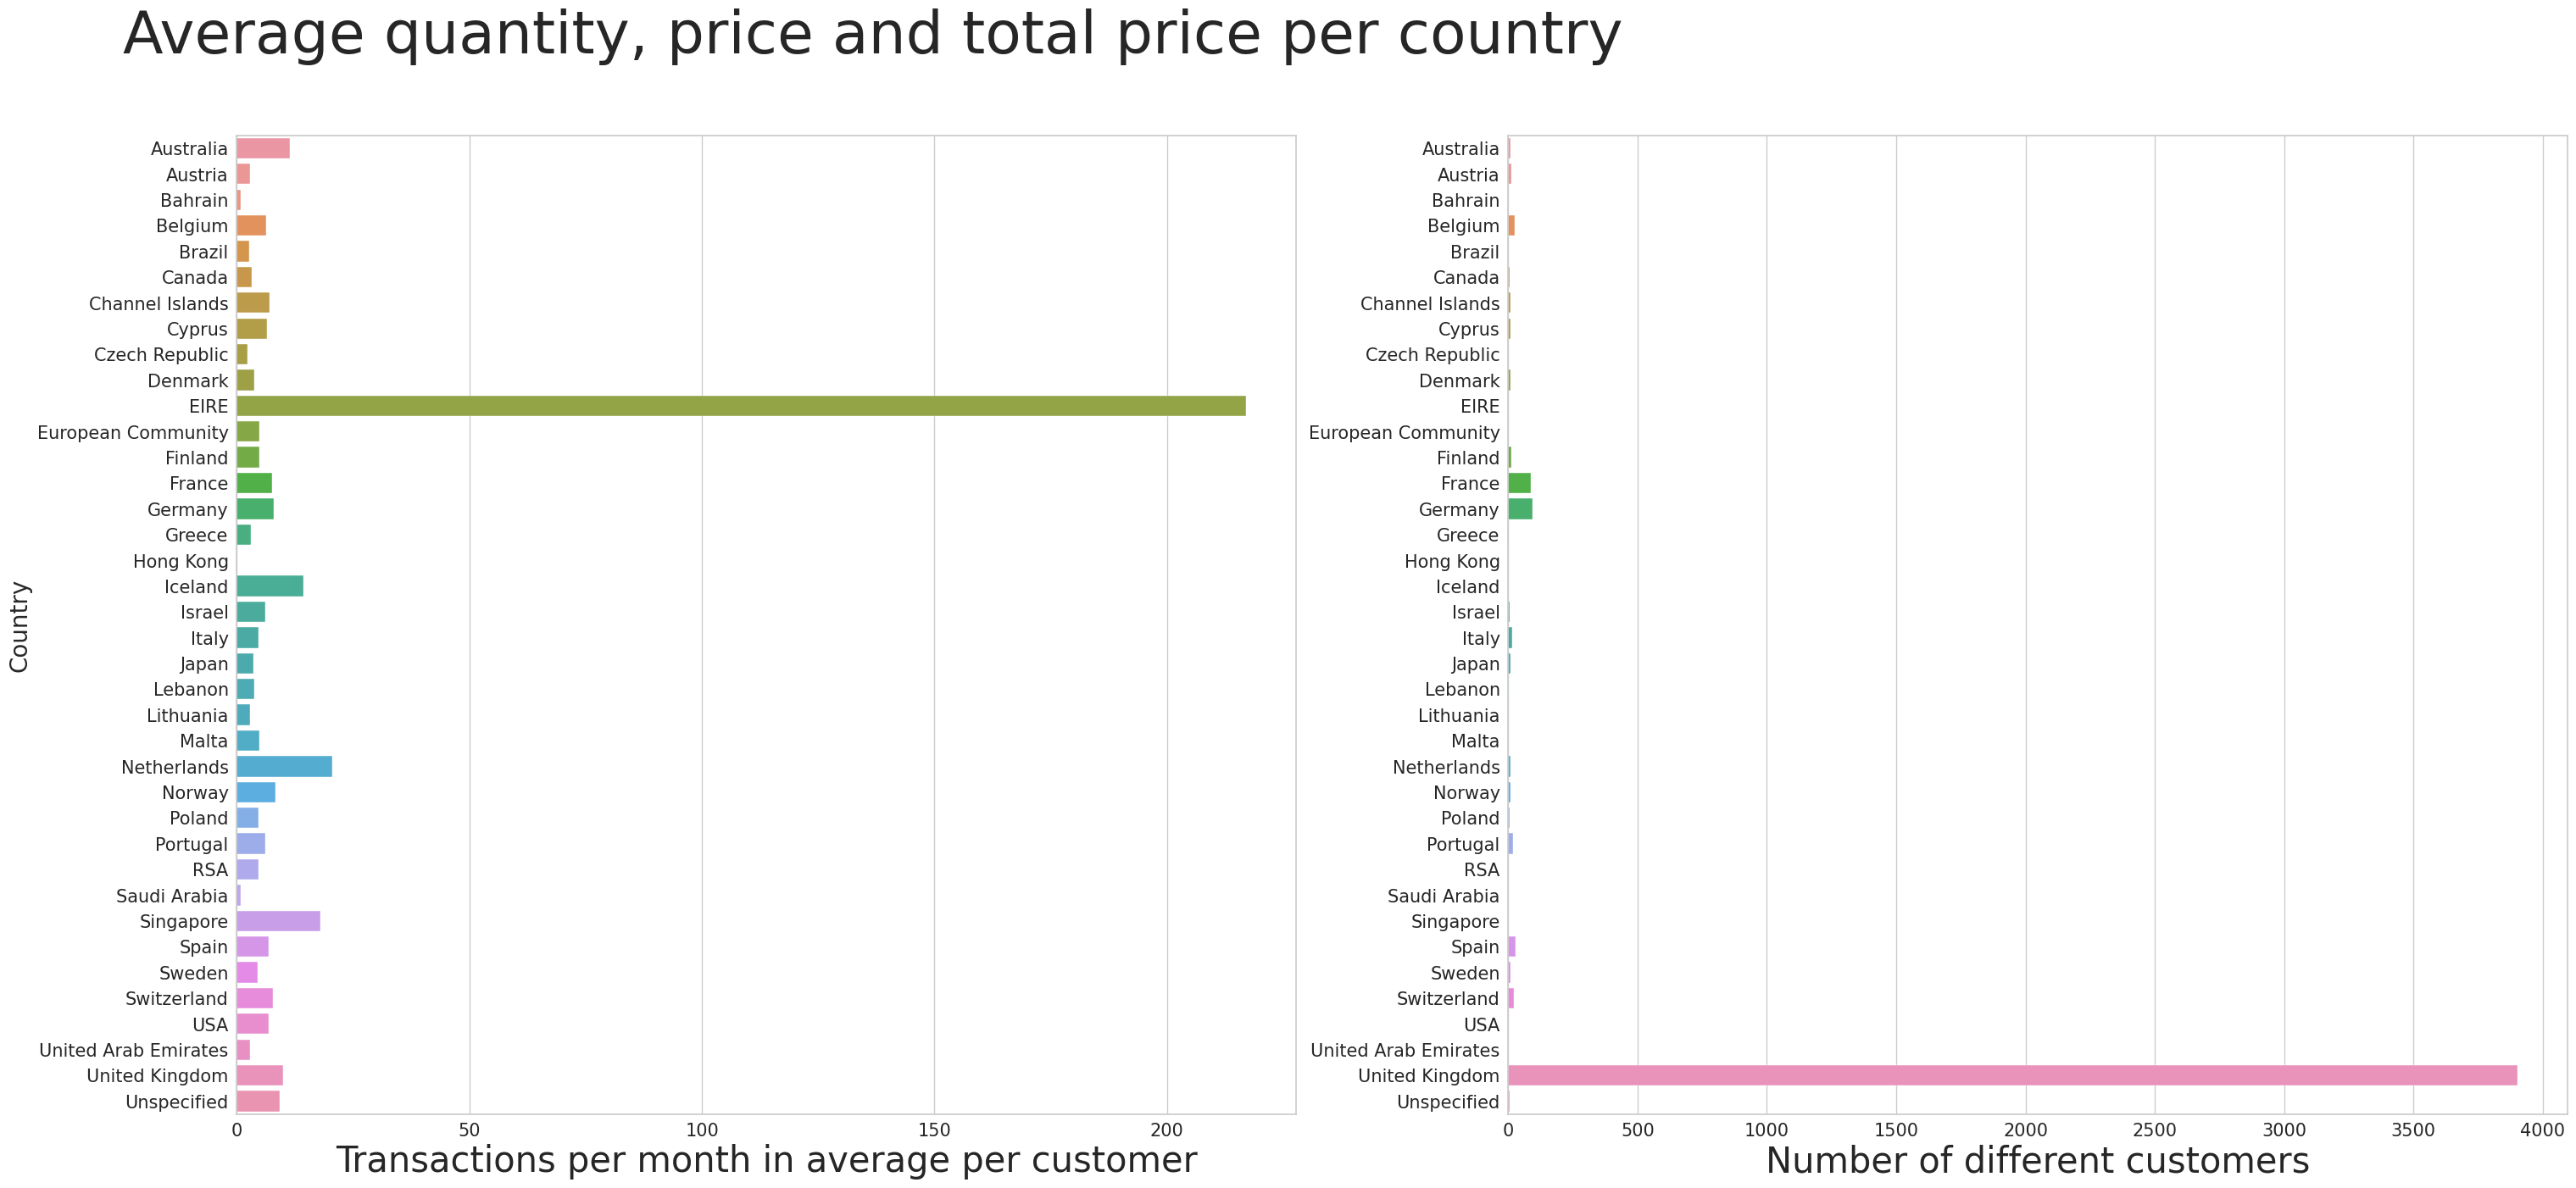

In [ ]:
fig = plt.figure(figsize = (20,15))
fig.suptitle("Average quantity, price and total price per country",size=50)

axes = fig.add_subplot(1, 2, 1)
sns.barplot(data=transactions_per_customer_per_countries,x="Value",y="Country")
axes.set_xlabel('Transactions per month in average per customer',size = 30)
axes.set_ylabel('Country',size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

axes = fig.add_subplot(1, 2, 2)
sns.barplot(data=transactions_per_customer_per_countries,x="CustomerID",y="Country")
axes.set_xlabel('Number of different customers',size = 30)
axes.set_ylabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.subplots_adjust(right=1.5)

plt.show()

In [ ]:
transactions_per_customer_without_ireland = transactions_per_customer_per_countries[transactions_per_customer_per_countries.Country!="EIRE"]
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = transactions_per_customer_without_ireland["Country"],
                  locationmode = "country names",
                  z = transactions_per_customer_without_ireland["Value"].astype(float).round(0).tolist(),
                  hovertext = transactions_per_customer_without_ireland["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Transactions", },
                )



layout = dict(
              title = "Transactions Per Month In Average Per Customer Excluding Ireland",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}
             )

fig = go.Figure(data=choro_data, layout=layout)
iplot(fig)

In [ ]:
transactions_per_customer_per_countries.Description.sum()/transactions_per_customer_per_countries.CustomerID.sum()/12

9.851611908067254

What countries are the most active?

In [ ]:
general_trend_country = pd.DataFrame(data={'Date':pd.to_datetime(df.InvoiceDate),
                                   'Country':df.Country,
                                  'Total price':df.Quantity*df.UnitPrice})
general_trend_country = general_trend_country.groupby([general_trend_country.Date.dt.to_period("M"),general_trend_country.Country]).sum()
general_trend_country = pd.DataFrame(general_trend_country).reset_index()

<ipython-input-110-d6eabcd24a31>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
general_trend_country.groupby([general_trend_country.Country]).sum().sort_values(by='Total price',ascending=False).head(10)

<ipython-input-111-2cf5f9c76167>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Total price
Country,
United Kingdom,7207219.683
Netherlands,247908.660
EIRE,233058.520
Germany,191850.500
France,173482.940
Australia,114202.640
Switzerland,52505.350
Spain,43950.970
Belgium,35382.530


In [ ]:
general_trend_country.Date = general_trend_country.Date.dt.to_timestamp()

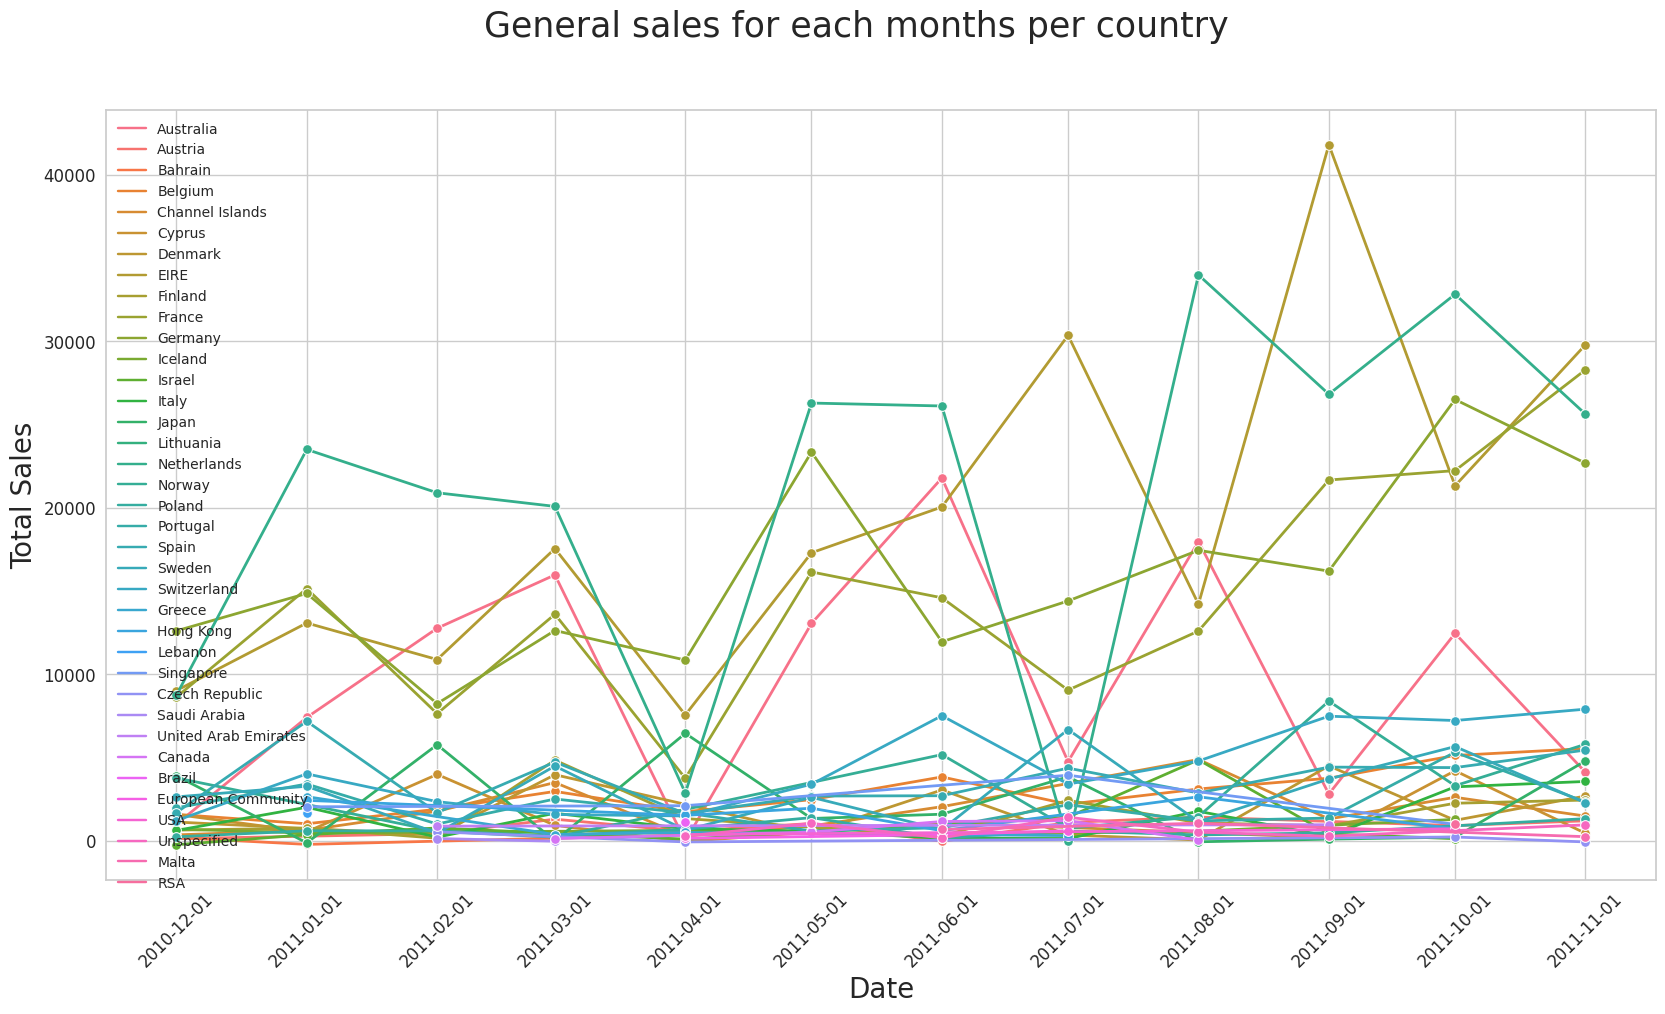

In [ ]:
plt.figure(figsize = (20,10)).suptitle('General sales for each months per country', fontsize=25)
lineplot = sns.lineplot(data=general_trend_country.loc[general_trend_country.Country!="United Kingdom"],x="Date", y="Total price",hue="Country", marker="o",linewidth = 2)

x_dates = pd.to_datetime(dates).strftime('%Y-%m').sort_values().unique()

lineplot.set_xlabel("Date",fontsize=20)
lineplot.set_ylabel("Total Sales",fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(x_dates,rotation = 45,fontsize=12)
plt.legend(loc='upper left')

plt.show()

In [ ]:
country_sales = pd.DataFrame(general_trend_country[general_trend_country.Country!="United Kingdom"].groupby("Country")["Total price"].sum()).reset_index()


In [ ]:
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  z = country_sales["Total price"].astype(float).round(0).tolist(),
                  hovertext = country_sales["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Total Price", },
)


layout = dict(
              title = "Total Sales For Each Countries Excludind UK",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}
             )

fig = go.Figure(data=choro_data, layout=layout)
iplot(fig)



How many new customers each months?

In [ ]:
number_customers = df.groupby(df["InvoiceDate"].dt.to_period('M'))["CustomerID"].nunique()
number_customers = pd.DataFrame(data=number_customers).reset_index()
number_customers["Date"] = number_customers.InvoiceDate.dt.to_timestamp()

number_new_customers = []
customers_seen = []
for month in df["InvoiceDate"].dt.to_period('M').unique():
    customers = df[df["InvoiceDate"].dt.to_period('M') == month].CustomerID.unique()
    count=0
    for customer in customers:
        if customer not in customers_seen:
            count+=1
            customers_seen.append(customer)
    number_new_customers.append((month,count))
number_new_customers = pd.DataFrame(number_new_customers,columns=["Date","New customers"])
number_new_customers.Date = number_new_customers.Date.dt.to_timestamp()

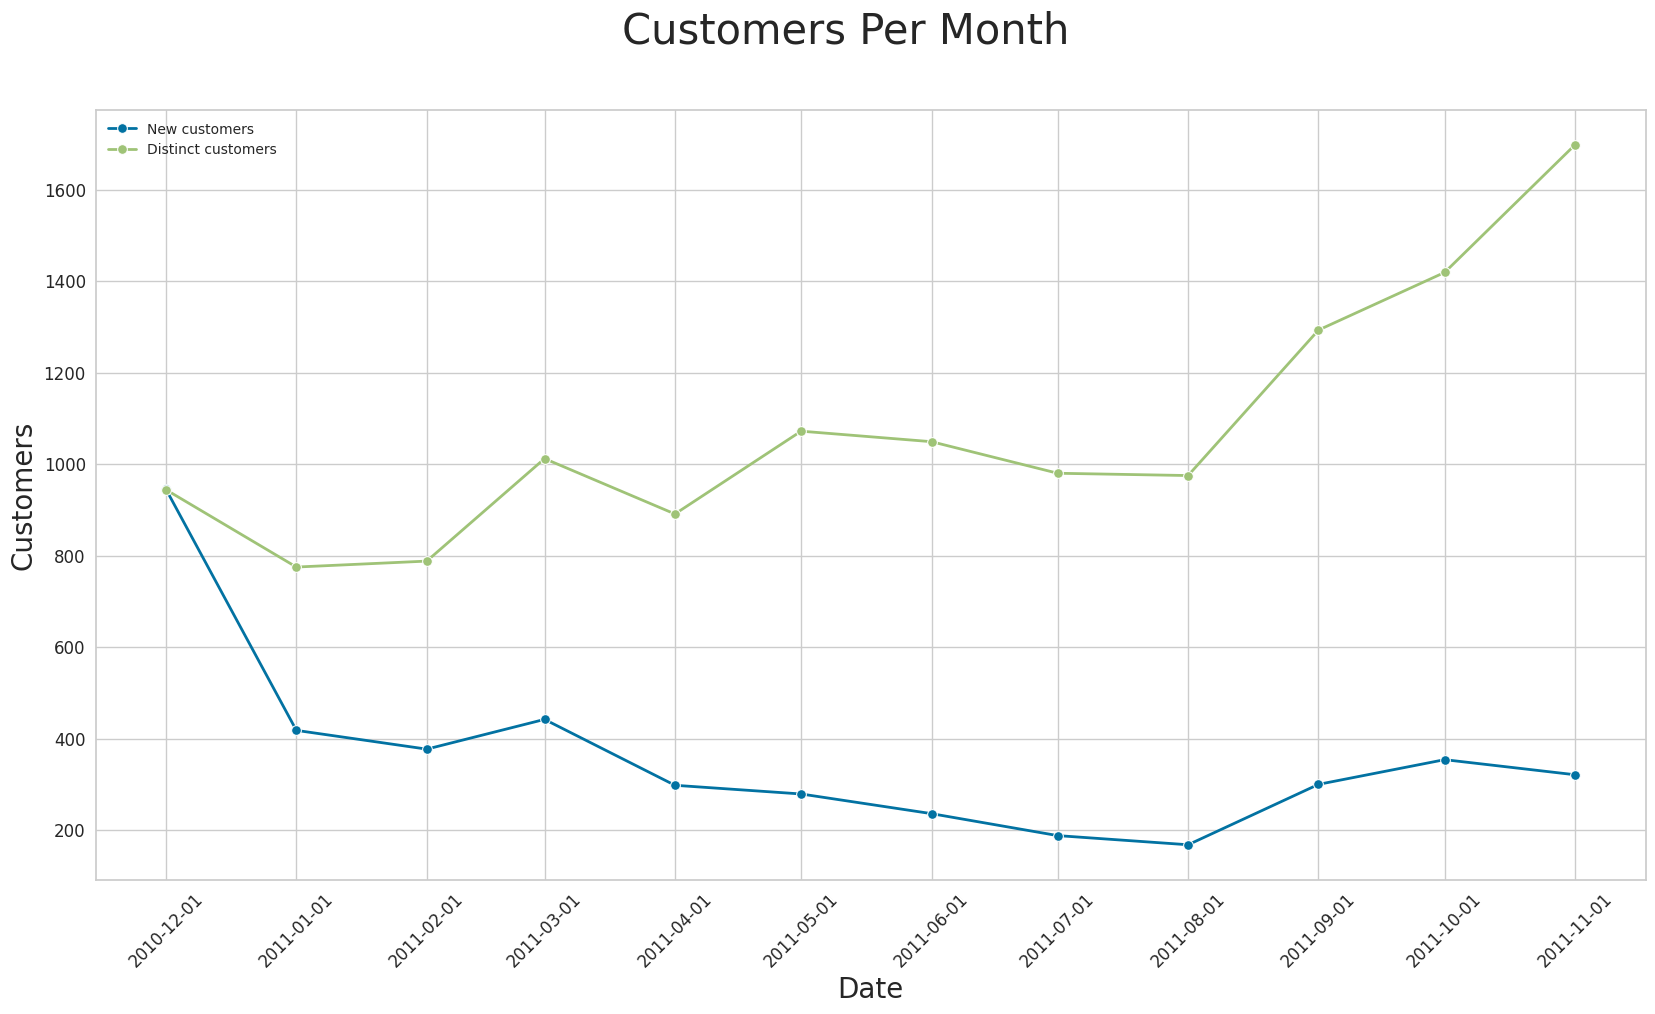

In [ ]:
fig  = plt.figure(figsize = (20,10)).suptitle('Customers Per Month', fontsize=30)
lineplot = sns.lineplot(data=number_new_customers,x="Date", y="New customers", marker="o",linewidth = 2, label="New customers")
sns.lineplot(data=number_customers,x="Date", y="CustomerID", marker="o",linewidth = 2, label="Distinct customers")

lineplot.set_xlabel("Date",fontsize=20)
lineplot.set_ylabel("Customers",fontsize=20)
plt.xticks(dates,rotation = 45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()



How many new customers each months?

In [ ]:
df_temp = df.groupby([df.CustomerID,df.InvoiceDate]).Quantity.sum()
df_temp = pd.DataFrame(df_temp).reset_index()

In [ ]:
df_temp["Hour"]= df_temp["InvoiceDate"].dt.hour
df_temp["Month"]= df_temp["InvoiceDate"].dt.to_period('M')

In [ ]:
count_hours = pd.DataFrame(columns=range(1,25))
count_hours["Month"] = ""

for month in sorted(df_temp["Month"].unique()):
    row = []
    for hour in range(1,25):
        freq = len(df_temp[(df_temp["Month"]==month)&(df_temp["Hour"]==hour)])
        row.append(float(freq))
    row.append(month)
    count_hours.loc[len(count_hours)] = row

count_hours = count_hours.set_index("Month")

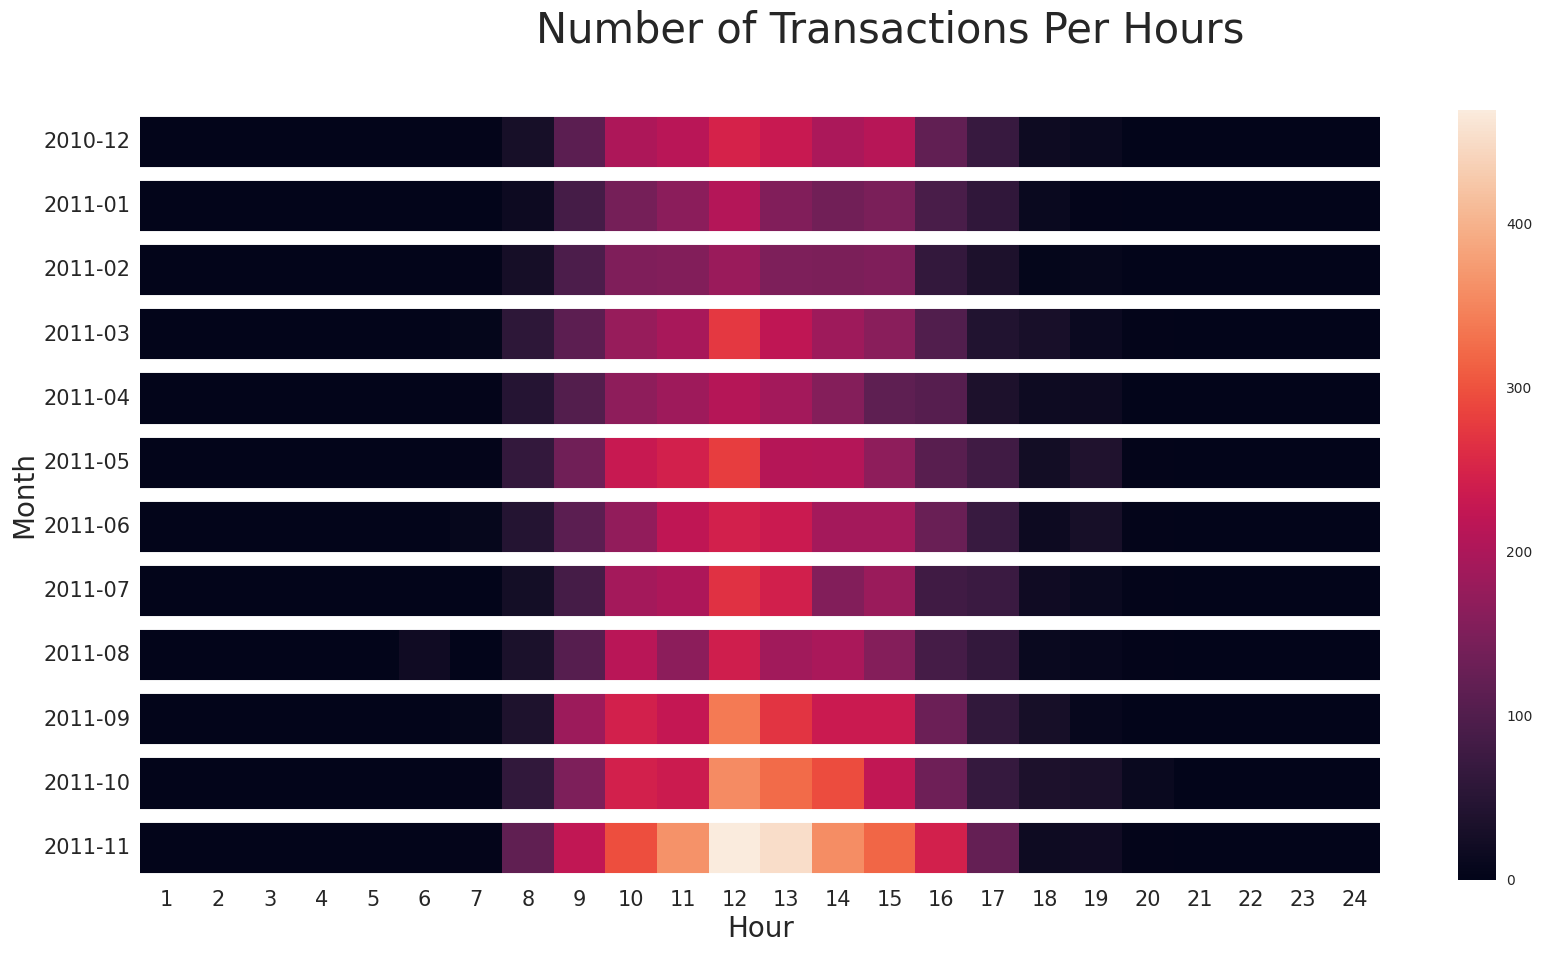

In [ ]:
fig  = plt.figure(figsize = (20,10)).suptitle('Number of Transactions Per Hours', fontsize=30)
heatmap = sns.heatmap(data=count_hours)
plt.yticks(rotation=0,size=15)
plt.xticks(size=15)
heatmap.set_xlabel("Hour",fontsize=20)
heatmap.set_ylabel("Month",fontsize=20)
for i in range(count_hours.shape[1] + 1):
    plt.axhline(i, color='white', lw=10
               )

plt.show()

In [ ]:
def daytime_encoder(date):
    if (date.hour >= 5)&(date.hour < 8):
        return "Early morning"
    elif (date.hour >= 8)&(date.hour < 11):
        return "Morning"
    elif (date.hour >= 11)&(date.hour < 13):
        return "Late morning"
    elif (date.hour >= 13)&(date.hour < 14):
        return "Early afternoon"
    elif (date.hour >= 14)&(date.hour < 15):
        return "Afternoon"
    elif (date.hour >= 15)&(date.hour < 17):
        return "Late afternoon"
    elif (date.hour >= 17)&(date.hour < 21):
        return "Evening"
    else:
        return date.hour

df_temp['InvoiceDate'] = pd.to_datetime(df_temp['InvoiceDate'])
df_temp['InvoiceDate'] = df_temp['InvoiceDate'].map(daytime_encoder)


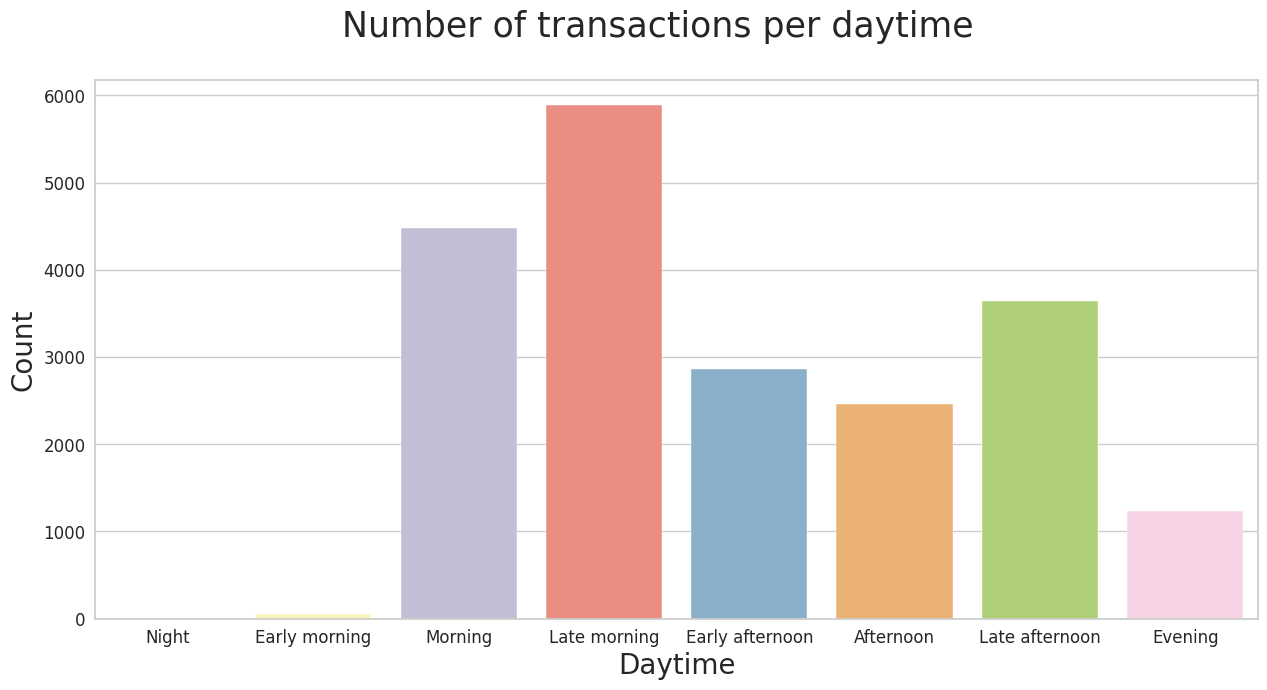

In [ ]:
fig  = plt.figure(figsize = (15,7)).suptitle('Number of transactions per daytime', fontsize=25)
countplot = sns.countplot(data=df_temp,x="InvoiceDate",order = ["Night","Early morning","Morning","Late morning","Early afternoon","Afternoon","Late afternoon","Evening"], palette="Set3")

countplot.set_xlabel("Daytime",fontsize=20)
countplot.set_ylabel("Count",fontsize=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## RFM-Customer Segmentation


In [ ]:
today_date = dt.datetime(2011, 12, 1)

In [ ]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'TotalPrice' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [ ]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12347.0,30,6,4085.18,4,4,5,44,loyal_customers
1,12348.0,66,4,1437.24,3,4,4,34,loyal_customers
2,12349.0,9,1,1457.55,5,1,4,51,new_customers
3,12350.0,301,1,294.40,1,1,2,11,hibernating
4,12352.0,27,8,1265.41,4,5,4,45,loyal_customers


In [ ]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(15)

,segment,count
0,about_to_sleep,361
1,at_Risk,612
2,cant_loose,80
3,champions,634
4,hibernating,1018
5,loyal_customers,797
6,need_attention,177
7,new_customers,66
8,potential_loyalists,474
9,promising,95


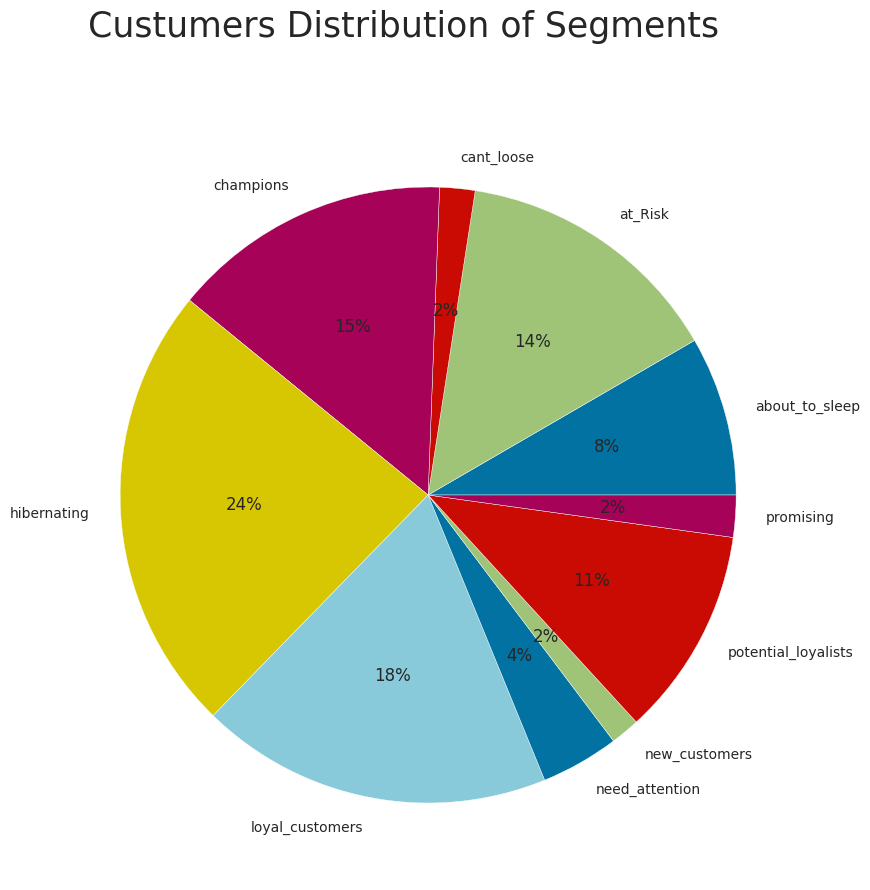

In [ ]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [ ]:
agg_list=["mean", "count", "max"]
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(agg_list)

recency             frequency                monetary  \
                           mean count  max       mean count  max         mean   
segment                                                                         
about_to_sleep        49.229917   361   68   1.243767   361    2   424.363521   
at_Risk              158.434641   612  363   3.155229   612    6   812.612583   
cant_loose           130.025000    80  303   8.962500    80   35  2227.118000   
champions              5.052050   634   12  13.246057   634  232  5048.993770   
hibernating          215.314342  1018  364   1.169941  1018    2   373.458684   
loyal_customers       31.190715   797   68   8.065245   797   65  2862.478471   
need_attention        47.977401   177   68   2.570621   177    3   784.676045   
new_customers          6.121212    66   12   1.000000    66    1   301.440758   
potential_loyalists   14.208861   474   30   2.099156   474    3   617.368903   
promising             20.747368    95   30   1.000000    95    1   357.926105   

                                      
                    count        max  
segment                               
about_to_sleep        361    4279.71  
at_Risk               612    6336.00  
cant_loose             80   11056.93  
champions             634  243207.14  
hibernating          1018    9338.38  
loyal_customers       797  101452.26  
need_attention        177    3683.86  
new_customers          66    1457.55  
potential_loyalists   474    3280.75  
promising              95    6207.67

## Clustering - Segmentation of the customers

In [ ]:
df_clustering = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : 'nunique',
                                     'TotalPrice' : 'sum'})

df_clustering.columns = ['recency', 'frequency', 'monetary']

In [ ]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

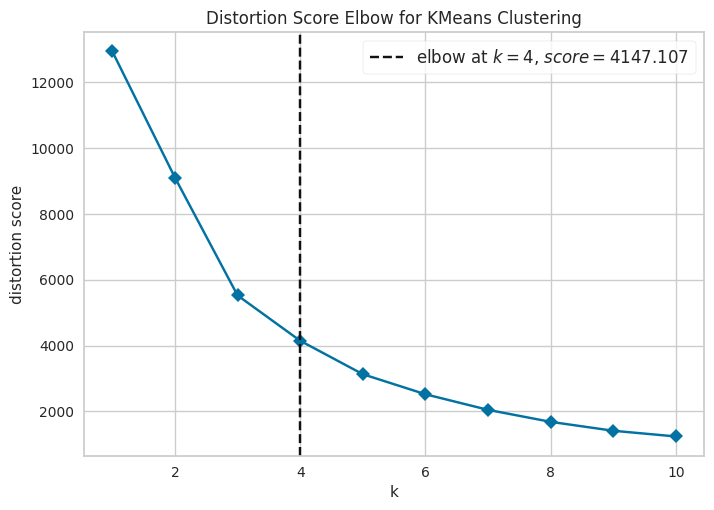

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,recency,frequency,monetary
0,-0.505254,-0.077718,-0.072624
1,1.510358,-0.346979,-0.209627
2,-0.861259,11.163562,14.164879
3,-0.781703,2.367451,1.406011


In [ ]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [ ]:
df_kmeans = df_clustering.copy()
df_kmeans['labels'] = df_labels['labels'].values

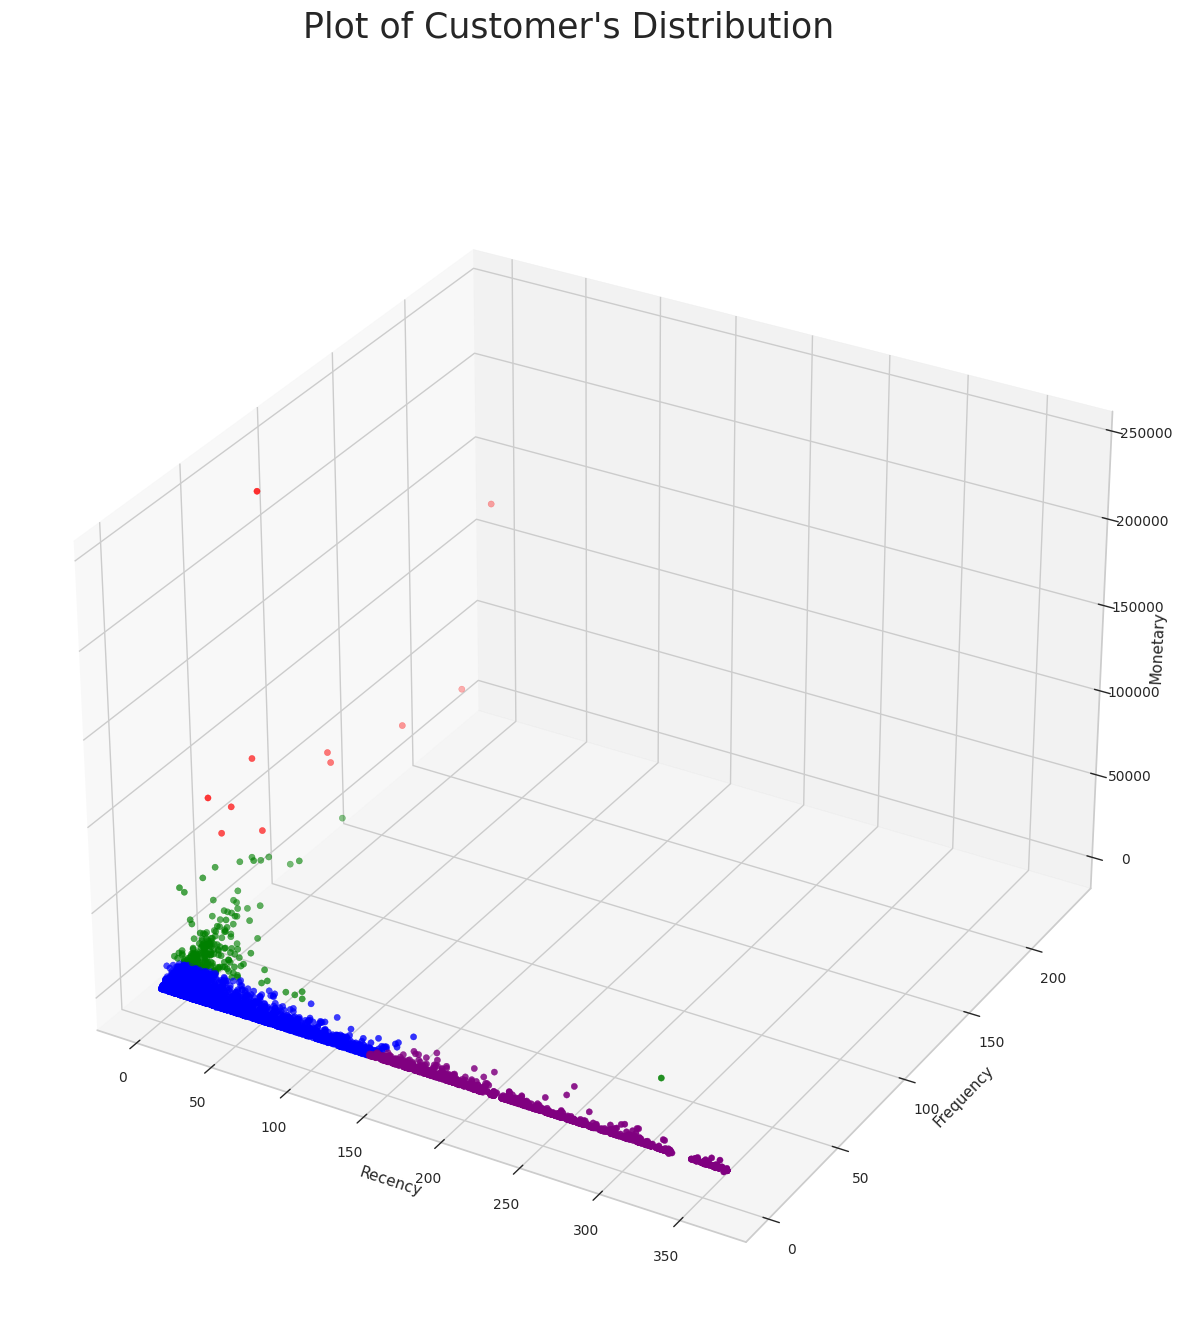

In [ ]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetary"], marker='o', c=colors[df_kmeans["labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [ ]:
agg_list=["mean", "count", "max",]
df_kmeans[["labels", "recency", "frequency", "monetary"]].groupby("labels").agg(agg_list)

recency              frequency                 monetary        \
              mean count  max        mean count  max          mean count   
labels                                                                     
0        40.140845  2982  154    4.128102  2982   17   1234.838971  2982   
1       240.643885  1112  364    1.785971  1112   13    426.001314  1112   
2         4.727273    11   16  101.909091    11  232  85289.753636    11   
3        12.641148   209  293   25.397129   209  123   9964.353732   209   

                   
              max  
labels             
0        11056.93  
1         9338.38  
2       243207.14  
3        50415.49

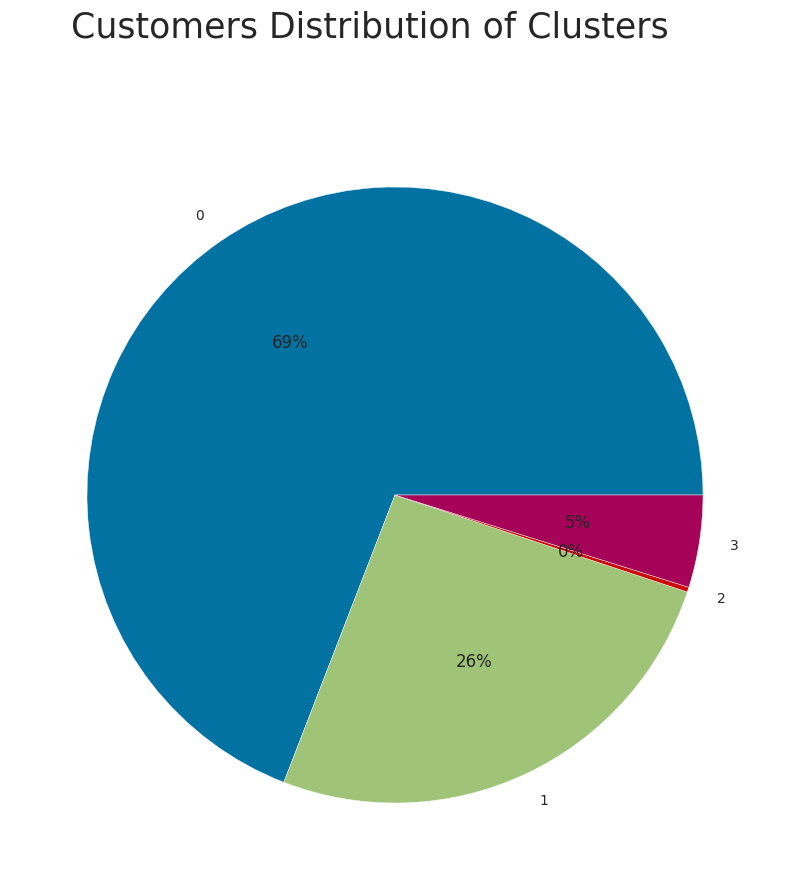

In [ ]:
df_kmeans = df_kmeans.reset_index()
clusters_count = df_kmeans.groupby("labels").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']

fig  = plt.figure(figsize = (20,10)).suptitle('Customers Distribution of Clusters', fontsize=25)
plt.pie(clusters_count["count"], labels = clusters_count["cluster"], autopct='%.0f%%')

plt.show()

<!-- ## SAMPLE WORK -->

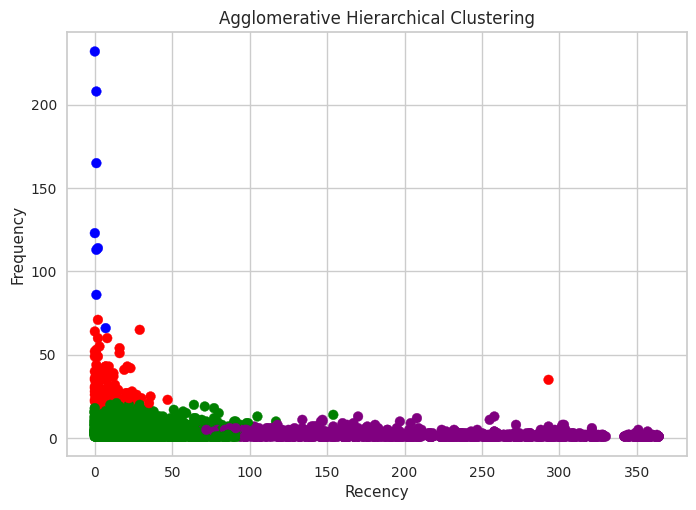

           recency              frequency                 monetary        \
              mean count  max        mean count  max          mean count   
labels                                                                     
0         1.625000     8    7  138.375000     8  232  71215.850000     8   
1       208.465132  1477  364    2.052810  1477   13    516.052357  1477   
2        10.860465   129  293   30.364341   129   71  14975.037674   129   
3        29.878889  2700  154    4.692222  2700   21   1449.268334  2700   

                   
              max  
labels             
0       243207.14  
1         9338.38  
2       101452.26  
3        14808.78  


In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# import matplotlib.pyplot as plt

# # Create the AgglomerativeClustering object
# agg_cluster = AgglomerativeClustering(n_clusters=4)

# # Fit the clustering model to the data
# labels = agg_cluster.fit_predict(df_scaled)

# # Add the cluster labels to the original data
# df_clustering['labels'] = labels

# # Visualize the clusters
# colors = np.array(["blue", "purple", "red", "green"])
# plt.scatter(df_clustering['recency'], df_clustering['frequency'],df_clustering['monetary'] c=colors[labels])
# plt.xlabel('Recency')
# plt.ylabel('Frequency')
# plt.title('Agglomerative Hierarchical Clustering')
# plt.show()

# # Calculate cluster statistics
# agg_cluster_stats = df_clustering.groupby('labels').agg({'recency': ['mean', 'count', 'max'],
#                                                         'frequency': ['mean', 'count', 'max'],
#                                                         'monetary': ['mean', 'count', 'max']})
# print(agg_cluster_stats)


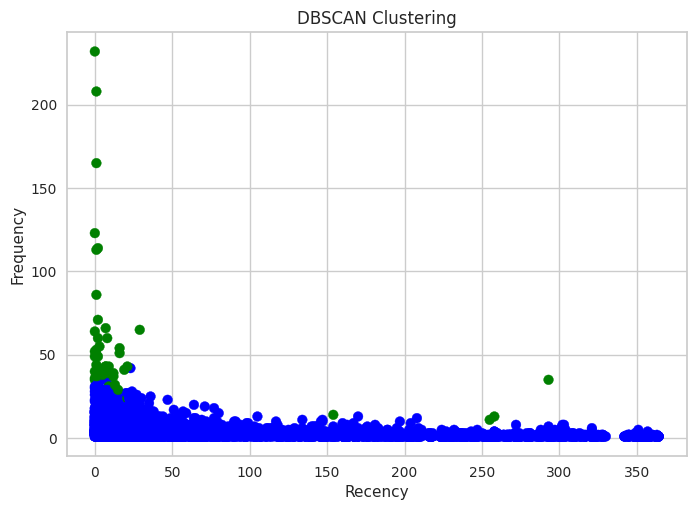

          recency             frequency                 monetary        \
             mean count  max       mean count  max          mean count   
labels                                                                   
-1      26.909091    55  293  51.036364    55  232  34142.729818    55   
 0      91.220944  4259  364   4.207091  4259   42   1244.163032  4259   

                   
              max  
labels             
-1      243207.14  
 0       15433.97  


In [ ]:
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt

# # Create the DBSCAN object
# dbscan = DBSCAN(eps=0.5, min_samples=5)

# # Fit the clustering model to the data
# dbscan.fit(df_scaled)

# # Obtain the cluster labels
# labels = dbscan.labels_

# # Add the cluster labels to the original data
# df_clustering['labels'] = labels

# # Visualize the clusters
# colors = np.array(["blue", "purple", "red", "green"])
# plt.scatter(df_clustering['recency'], df_clustering['frequency'], c=colors[labels])
# plt.xlabel('Recency')
# plt.ylabel('Frequency')
# plt.title('DBSCAN Clustering')
# plt.show()

# # Calculate cluster statistics
# dbscan_cluster_stats = df_clustering.groupby('labels').agg({'recency': ['mean', 'count', 'max'],
#                                                             'frequency': ['mean', 'count', 'max'],
#                                                             'monetary': ['mean', 'count', 'max']})
# print(dbscan_cluster_stats)
